In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [34]:
df = pd.read_csv('..\Initial_data\K5F5\K5F5_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_16640\659294485.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5F5\K5F5_cor.csv', ";")


,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.110403,4.224950,13.78617,4.584234,1.391578,312.5545,-40.09245,-39.37344,38.50135,55.80167,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.29330,3.947831,125.8089,272.8238
1,4.112575,4.227241,11.90175,3.316688,-0.645750,312.5571,-39.79466,-39.14466,38.05667,55.72771,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.34350,3.949697,125.8541,272.7920
2,4.113778,4.228291,10.79170,2.277516,-1.903453,312.5505,-40.09753,-39.45195,38.08927,55.77531,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.41330,3.949778,125.8552,272.5587
3,4.115534,4.230028,10.17877,1.721016,-2.264719,312.5371,-40.04427,-40.01524,38.10891,55.77896,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.49460,3.954266,125.7343,273.4935
4,4.119669,4.234331,10.18566,1.616016,-2.435016,312.5414,-39.67149,-38.28672,38.09208,55.95422,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.53500,3.957666,125.5335,273.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,4.054531,4.146553,13.56042,5.413078,1.812562,312.0508,-39.74531,-40.73698,37.85849,55.18422,...,419.7872,416.3644,4.072937,406.2756,19.28517,94.74323,94.76354,3.888934,109.6963,291.2326
24476,4.053782,4.145500,15.11245,6.654375,3.261562,312.0475,-40.18984,-40.17812,38.00547,55.58688,...,420.2850,416.8966,4.071069,406.3053,19.44423,94.78865,94.73187,3.887822,109.7346,290.9655
24477,4.054050,4.145563,14.16778,6.071625,2.973141,312.0390,-39.89101,-41.47200,37.95641,55.98161,...,420.6609,417.2797,4.070075,406.6363,19.57814,94.84937,94.64396,3.887925,109.9206,290.5517
24478,4.054375,4.146209,13.59717,5.018015,2.067844,312.0131,-40.71276,-39.99089,37.94604,56.10453,...,420.8572,417.4550,4.069144,406.4106,19.69776,94.92615,94.58417,3.889253,110.1532,290.8658


<AxesSubplot:>

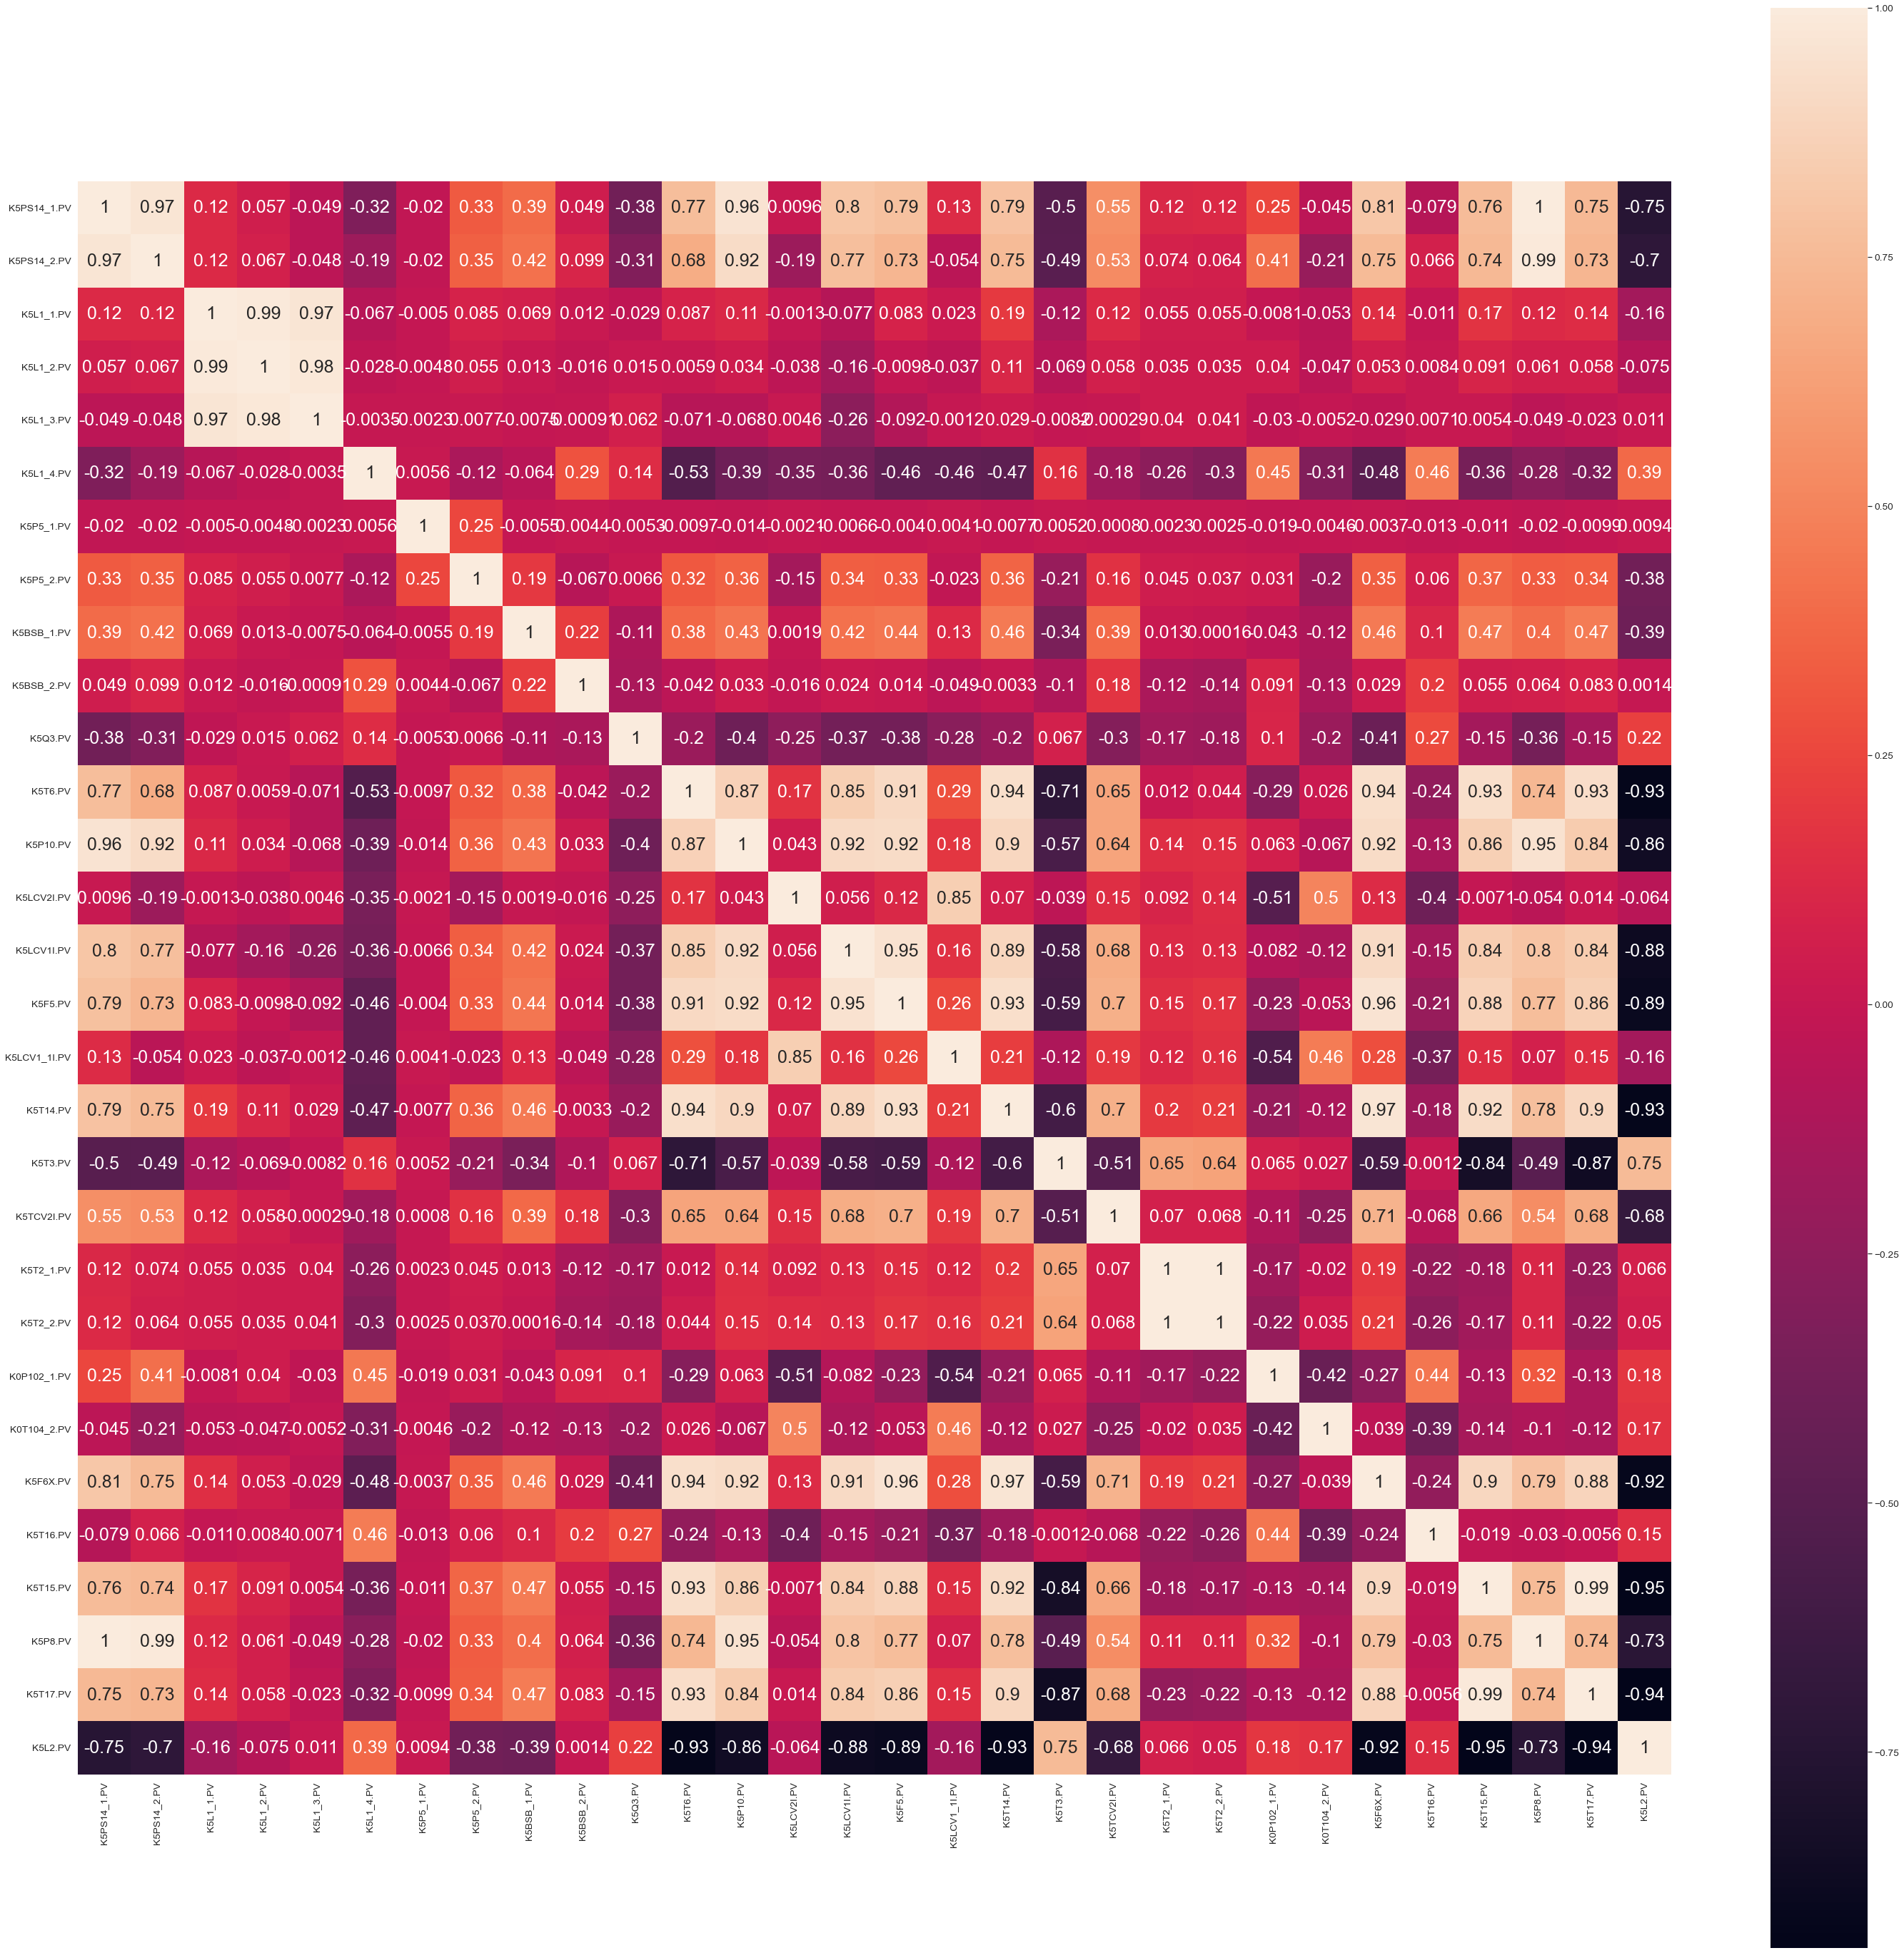

In [13]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [73]:
df = pd.read_csv('..\Initial_data\K5F5\K5F5.csv', ";")
df

C:\Users\Graf_35\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,K5LCV1I.PV,K5F5.PV
0,30.77729,21.12289
1,33.47161,21.20488
2,31.71500,21.25780
3,30.90760,21.27381
4,33.06693,21.28943
...,...,...
39217,56.69094,40.41797
39218,57.72594,40.42391
39219,55.37844,40.64570
39220,56.32594,40.88482


In [74]:
df=df.dropna()
df=df.round(2)
df=df.drop_duplicates(["K5F5.PV"])
df=df.drop_duplicates(["K5LCV1I.PV"])
df

,K5LCV1I.PV,K5F5.PV
0,30.78,21.12
1,33.47,21.20
2,31.72,21.26
3,30.91,21.27
4,33.07,21.29
...,...,...
39215,57.71,40.40
39216,57.72,40.41
39217,56.69,40.42
39220,56.33,40.88


In [71]:
y = df.drop(['K5LCV1I.PV'], axis=1)
x = df.drop(['K5F5.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(0, 100, 100)[:, np.newaxis] # Точки для предсказания

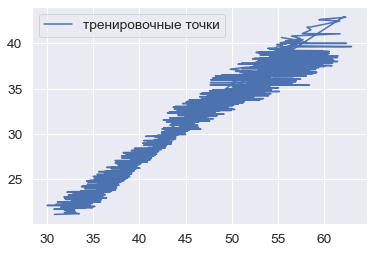

In [75]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


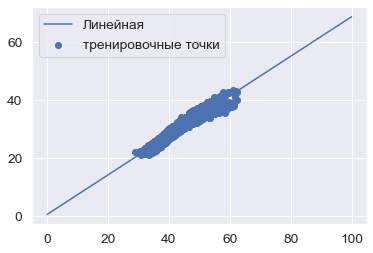

array([0.93383064, 0.93773224])

In [29]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

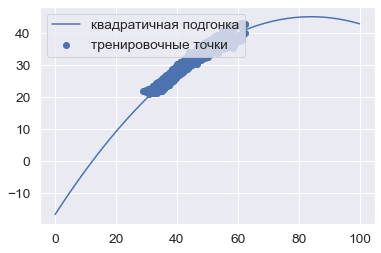

array([0.93383064, 0.93773224])

In [31]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

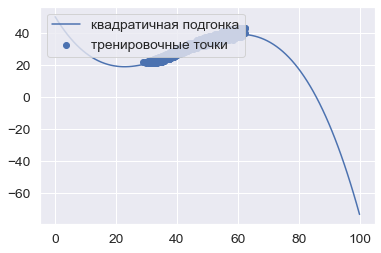

array([0.93383064, 0.93773224])

In [33]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

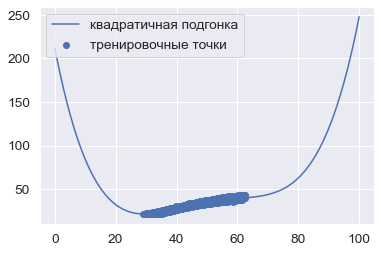

array([0.93383064, 0.93773224])

In [42]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

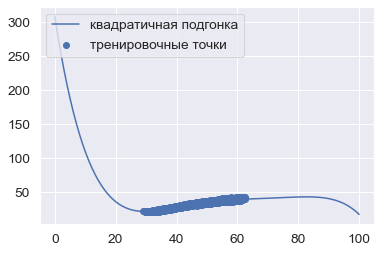

array([0.93383064, 0.93773224])

In [43]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

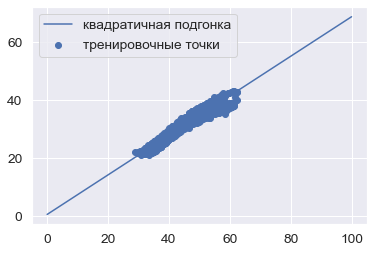

0.9362728267595473

In [49]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [57]:
import pickle
filename = '../model/K5F5.sav'
pickle.dump(pr, open(filename, 'wb'))

In [62]:
loaded_model = pickle.load(open("../model/K5F5.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)
cross_val_score(loaded_model, X_test, y_test, cv=100)

array([ -5.7855033 ,   0.88625433,   0.94396358,   0.9681126 ,
         0.98679687,   0.76136969,   0.93382933,   0.98728068,
         0.98240916,   0.92902358,   0.86314051,   0.91586329,
         0.82614502,   0.9348656 ,   0.91755442,   0.88108371,
         0.94666696,   0.365901  ,   0.85795186,  -4.61414828,
         0.91586073,   0.94344796,  -0.87790598,   0.74810807,
         0.95197698,   0.96680548,   0.74533262,   0.99709219,
         0.94204846,   0.96726559,   0.99012828,  -0.71271252,
         0.99621552,   0.92407523,   0.76346678,   0.45492916,
         0.46641392,   0.9130536 ,   0.91288585,   0.942078  ,
         0.45074918,   0.91071749,   0.88573122,   0.93999838,
         0.99255096,   0.76456211,   0.95740773, -25.87298787,
         0.78867278,   0.80390581,  -0.16278611,   0.65585731,
         0.97188654,   0.96238594,  -0.24889041,   0.98992687,
         0.87265518,   0.77242426,   0.94226261,  -0.04025941,
         0.67512106,   0.74843294,   0.95476632,  -4.62

In [63]:
a=np.array([[40]])

In [66]:
#loaded_model.predict(a)
loaded_model.predict(quadratic.fit_transform(a))

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([[28.14361028]])

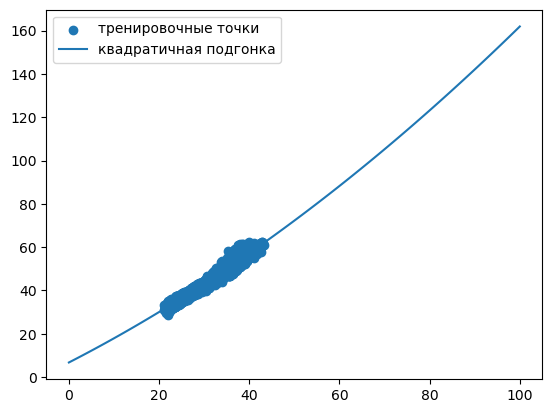

array([0.92979398, 0.91749797])

In [31]:
pr_auto = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
y_quad = quadratic.fit_transform(y_train)       # Преобразуем данные
pr_auto.fit(y_quad, X_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(y, x, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_auto, y_test, X_test, cv=2)

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


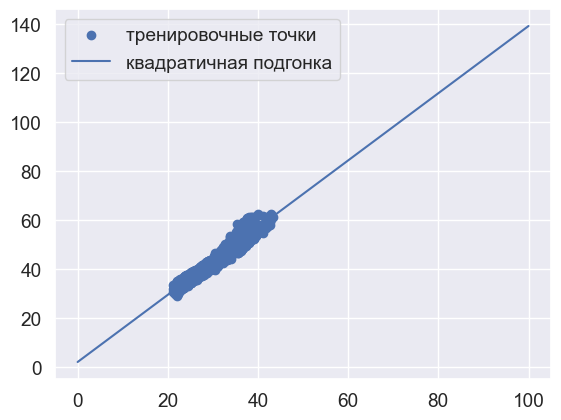

0.9279045577673499

In [55]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(y, x)
lasso.score(y, x)
clf = Ridge(alpha=0.5)
clf.fit(y, x)
y_pr=clf.predict(task)
plt.scatter(y, x, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(y_test, X_test)

In [57]:
clf.predict([[24.547]])

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([[35.78184985]])

In [32]:
filename = '../model/K5LCV1_auto.sav'
pickle.dump(pr_auto, open(filename, 'wb'))

In [53]:
loaded_model1 = pickle.load(open("../model/K5LCV1_auto.sav", 'rb'))
#result = loaded_model.score(X_test, y_test)
cross_val_score(loaded_model, X_test, y_test, cv=100)

array([ 5.62331401e-01,  8.68529273e-01,  8.65919118e-01,  8.16730927e-01,
        9.66985385e-01,  9.45500399e-01,  9.75331261e-01,  9.30724393e-01,
        9.53804739e-01,  9.16243653e-01,  9.90044946e-01,  7.48871798e-01,
        6.42749429e-01,  8.62134301e-01,  9.28380135e-01,  8.52128176e-01,
        8.42403800e-01,  8.47935434e-01,  9.35526307e-01,  9.51936134e-01,
        8.69642671e-01, -1.71620201e+00,  9.28443354e-01,  9.10886417e-01,
       -6.76611440e-01,  8.69796577e-01,  9.08843185e-01,  9.83536600e-01,
        3.47198125e-01,  9.91922229e-01,  8.66623328e-01,  9.86776233e-01,
        8.27144344e-01,  8.87521665e-01,  8.42240735e-01, -1.91725055e+00,
        9.92259385e-01,  3.89609537e-01, -9.43951619e-01,  9.27834594e-01,
        8.98330719e-01,  8.84473022e-01,  9.04596228e-01,  9.22505362e-01,
        8.76693203e-01,  9.74676112e-01,  7.00877072e-01,  6.90922005e-01,
        9.67258622e-01,  9.31199086e-01,  9.31098191e-01,  8.19092590e-01,
        9.22365733e-01,  

In [54]:
y_pr = loaded_model1.predict(quadratic.fit_transform([[28.12823863]]))
y_pr

array([[40.61032103]])